In [14]:
import torch
import torch.nn as nn
import torchvision.models as models

In [15]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        

/tmp/ipykernel_605753/4152210163.py:41: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_605753/4152210163.py:41: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_605753/4152210163.py:41: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


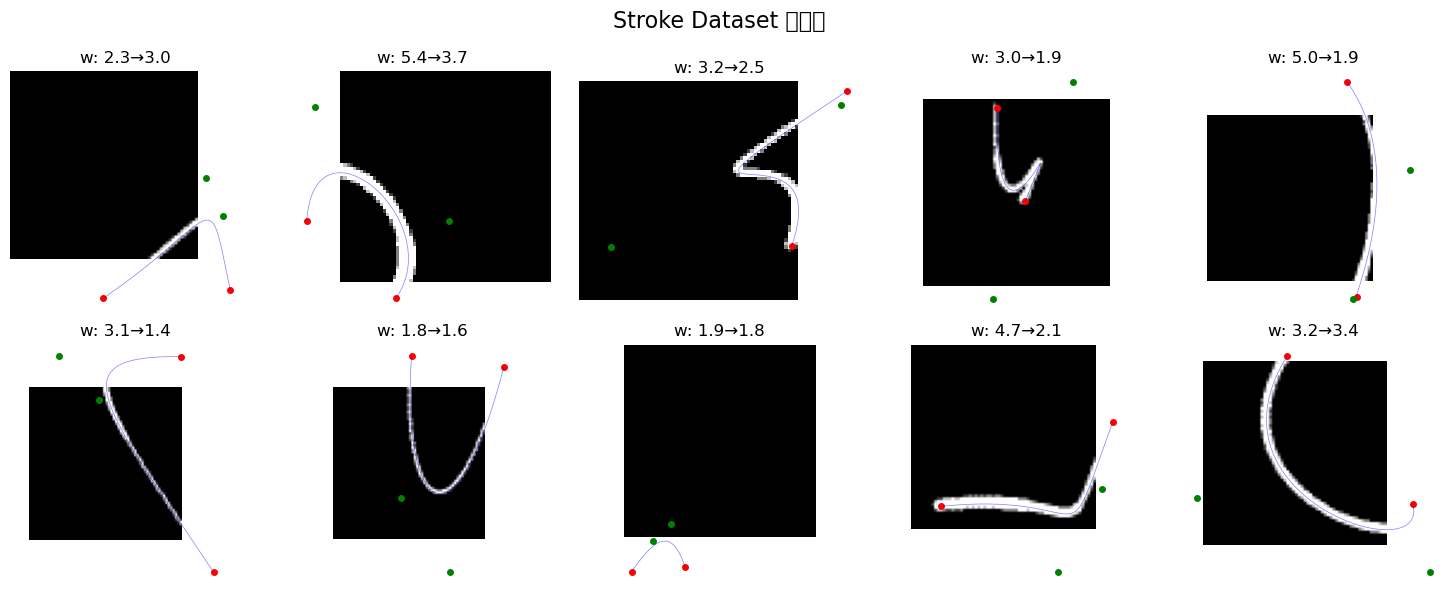

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import data
importlib.reload(data)
from data import StrokeDataset

# 创建数据集
dataset = StrokeDataset(size=64, length=10000)

# 创建画布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Stroke Dataset 可视化', fontsize=16)

# 展示10个样本
for idx in range(10):
    row = idx // 5
    col = idx % 5
    
    img, points, w_start, w_end = dataset.render_stroke()
    
    # 显示图像
    axes[row, col].imshow(img.squeeze(), cmap='gray', vmin=0, vmax=255)
    axes[row, col].set_title(f'w: {w_start:.1f}→{w_end:.1f}')
    axes[row, col].axis('off')
    
    # 绘制控制点
    for i, (px, py) in enumerate(points):
        axes[row, col].plot(px, py, 'ro' if i in [0, 3] else 'go', markersize=4)
    
    # 绘制贝塞尔曲线
    t = np.linspace(0, 1, 50)
    curve_x = []
    curve_y = []
    for ti in t:
        pt = dataset.get_bezier_point(ti, *points)
        curve_x.append(pt[0])
        curve_y.append(pt[1])
    axes[row, col].plot(curve_x, curve_y, 'b-', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()